In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm
import random 
import seaborn as sns

# **0. Definición de Funciones EDA**

## 0.1 Función de Distribuciones de las categórias principales

In [294]:
def distributions_main_categories(categorical_columns, df):
    colors = ['skyblue', 'lightcoral', 'lightseagreen', 'plum', 'lightgreen', 'peachpuff', 'wheat','skyblue' ,'lavender', 'thistle', 'powderblue'] #Definir una lista de colores. 
    for column in categorical_columns: #Recorrer cada una de las columnas categóricas.
        print(f"\033[1mDistribución de la variable: {column}\033[0m") #Imprimir el nombre de la columna categórica que se esta procesando.
        value_counts = df[column].value_counts() #Obtener la cantidad de veces que aparece cada valor único en la columna que se esta procesando.
        for value, count in value_counts.items(): #iterar sobre cada par obtenido.
            percentage = (count / df.shape[0]) * 100 #Calcular el porcentaje del valor procesado, respecto al total de filas del dataframe.
            print(f"Valor: {value} - Numero de incidencias: {count} - Porcentaje: {round(percentage, 2)}%") #Imprimir la información, redondeando el porcentaje a 2 cifras.
            
        plt.figure(figsize=(8, 5)) #Crea una nueva figura con un tamaño específico para el gráfico.
        value_counts.plot(kind='bar', color=random.choice(colors)) #Genera un gráfico de barras de la distribución de valores de la columna que se esta procesando.
        plt.xlabel('Valores') #Añadir la etiqueta del eje X: "Valores".
        plt.ylabel('Número de incidencias') #Añadir la etiqueta del eje Y: "Número de incidencias".
        plt.title(f'Distribución de la variable: {column}') #Añadir el título del gráfico, indicando qué columna está graficando.
        plt.show() #Mostrar el gráfico generado.

## 0.2 Función de correlación entre variables

In [282]:
def correlation_variables(df):
    correlation = df.corr() #Calcula la matriz de correlación de todas las columnas numéricas del DataFrame.
    plt.figure(figsize=(10, 8)) #Crea una nueva figura con un tamaño específico para el gráfico.
    sns.heatmap(correlation, annot=True, cmap='RdYlGn', center=0) #Dibujar un mapa de calor (heatmap) usando seaborn con los valores de la matriz de correlación.
    plt.title('Matriz de Correlación') #Agregar un título al gráfico.
    plt.show() #Mostrar el gráfico generado.

## 0.3 Función Estadísticas descriptivas para las variables numéricas

In [291]:
def describe_numeric_columns(numeric_columns,df):
    return df.loc[:,numeric_columns].describe() #Se selecciona todas las filas, pero solo las columnas numericas previamente listadas.

# **1. Selección de Dataset Original**

## Dataset: Heart Disease Dataset

El objetivo principal del conjunto de datos es **Predecir si un paciente tiene o no una enfermedad cardíaca**.

> **Link:** https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset


In [169]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Dataset contiene variables categóricas y númericas.

| Columna         | Tipo        | Descripción                                                                 |
|-----------------|-------------|-----------------------------------------------------------------------------|
| `age`           | Numérica    | Edad del paciente (en años)                                                 |
| `sex`           | Categórica  | Sexo del paciente (`1` = hombre, `0` = mujer)                               |
| `cp`            | Categórica  | Tipo de dolor torácico (0-3, donde 0 = típico anginoso, 3 = asintomático)   |
| `trestbps`      | Numérica    | Presión arterial en reposo (mm Hg)                                          |
| `chol`          | Numérica    | Colesterol sérico en mg/dl                                                  |
| `fbs`           | Categórica  | Azúcar en sangre en ayunas > 120 mg/dl (`1`=sí, `0`=no)                      |
| `restecg`       | Categórica  | Resultados del electrocardiograma en reposo                                 |
| `thalach`       | Numérica    | Frecuencia cardíaca máxima alcanzada                                        |
| `exang`         | Categórica  | Angina inducida por ejercicio (`1`=sí, `0`=no)                               |
| `oldpeak`       | Numérica    | Depresión del ST inducida por ejercicio en relación con el reposo          |
| `slope`         | Categórica  | Pendiente del segmento ST durante el ejercicio                              |
| `ca`            | Numérica    | Número de vasos principales coloreados por fluoroscopia (0-3)               |
| `thal`          | Categórica  | Resultado de la prueba de talio (`3` = normal, `6` = defecto fijo, `7` = reversible) |
| `target`        | Categórica  | Presencia de enfermedad cardíaca (`1`=sí, `0`=no)                            |

### Variables Categóricas

In [175]:

# Columnas categóricas
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'target']

### Variables Númericas

In [176]:
# Columnas numéricas
numeric_columns = ['age','trestbps','chol','thalach','oldpeak','ca']

## Visualizar los tipos de datos de las columnas del DataSet:

In [170]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

>Aunque todas las variables del DataSet reflejan un tipo de dato númerico, algunas de ellas son en realidad númericas discretas, por lo que las trabajaremos como categóricas.

##  Dataset con al menos 500 registros

In [171]:
print(f"Número de registros del DataSet: {df.shape[0]}")

Número de registros del DataSet: 1025


# **2. Análisis Exploratorio de Datos (EDA)**

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


> El DataFrame no posee valores nulos en en ninguna de sus filas.

## 2.1 Estadísticas descriptivas para las variables numéricas DataSet Original.

In [292]:
describe_numeric_columns(numeric_columns, df)

,age,trestbps,chol,thalach,oldpeak,ca
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.754146
std,9.072290,17.516718,51.59251,23.005724,1.175053,1.030798
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,0.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,4.000000


## 2.2 Distribuciones de las categorías principales DataSet Original.

Distribución de la variable: sex
Valor: 1 - Numero de incidencias: 713 - Porcentaje: 69.56%
Valor: 0 - Numero de incidencias: 312 - Porcentaje: 30.44%


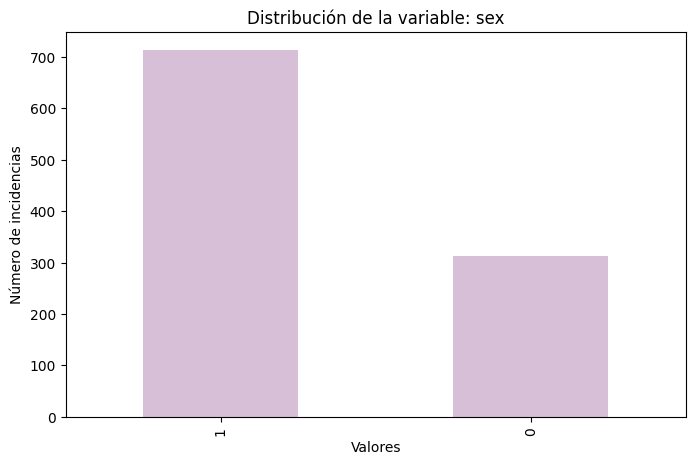

Distribución de la variable: cp
Valor: 0 - Numero de incidencias: 497 - Porcentaje: 48.49%
Valor: 2 - Numero de incidencias: 284 - Porcentaje: 27.71%
Valor: 1 - Numero de incidencias: 167 - Porcentaje: 16.29%
Valor: 3 - Numero de incidencias: 77 - Porcentaje: 7.51%


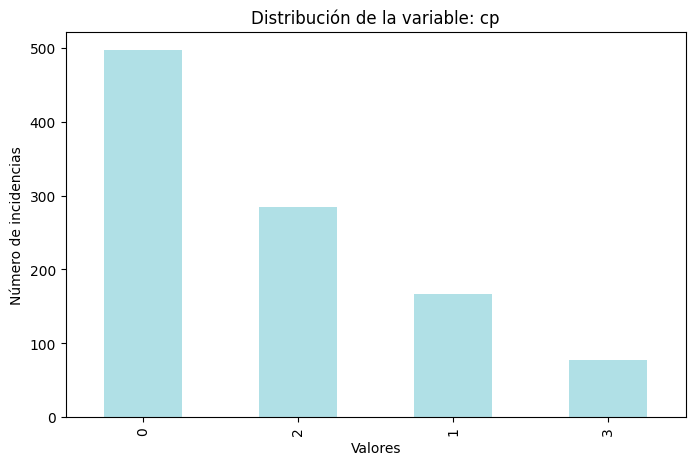

Distribución de la variable: fbs
Valor: 0 - Numero de incidencias: 872 - Porcentaje: 85.07%
Valor: 1 - Numero de incidencias: 153 - Porcentaje: 14.93%


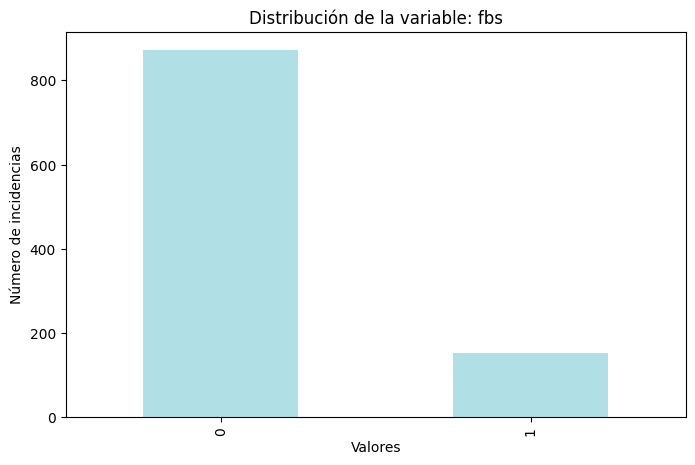

Distribución de la variable: restecg
Valor: 1 - Numero de incidencias: 513 - Porcentaje: 50.05%
Valor: 0 - Numero de incidencias: 497 - Porcentaje: 48.49%
Valor: 2 - Numero de incidencias: 15 - Porcentaje: 1.46%


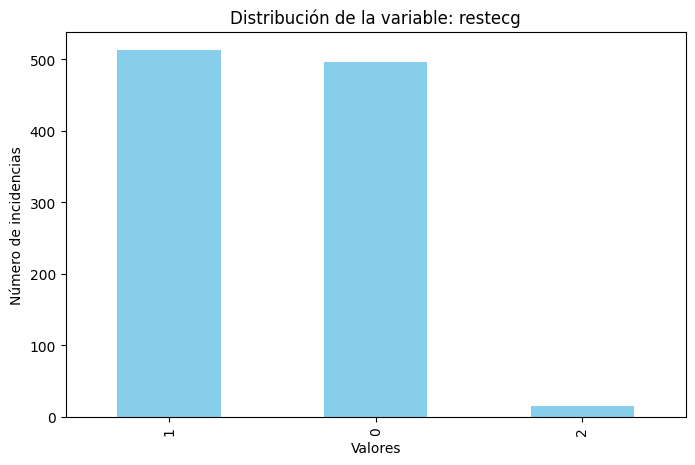

Distribución de la variable: exang
Valor: 0 - Numero de incidencias: 680 - Porcentaje: 66.34%
Valor: 1 - Numero de incidencias: 345 - Porcentaje: 33.66%


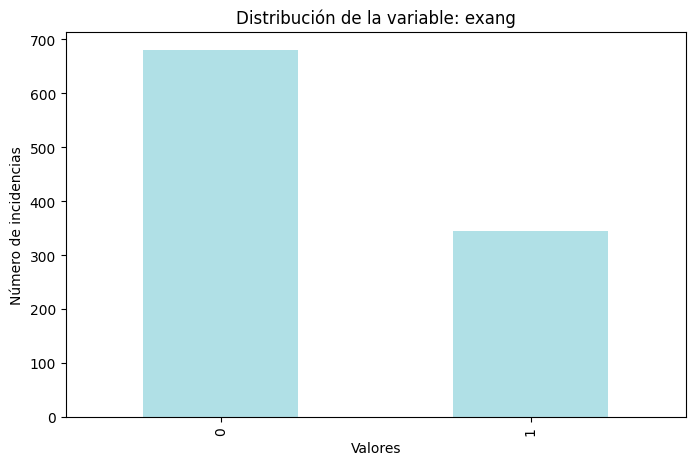

Distribución de la variable: slope
Valor: 1 - Numero de incidencias: 482 - Porcentaje: 47.02%
Valor: 2 - Numero de incidencias: 469 - Porcentaje: 45.76%
Valor: 0 - Numero de incidencias: 74 - Porcentaje: 7.22%


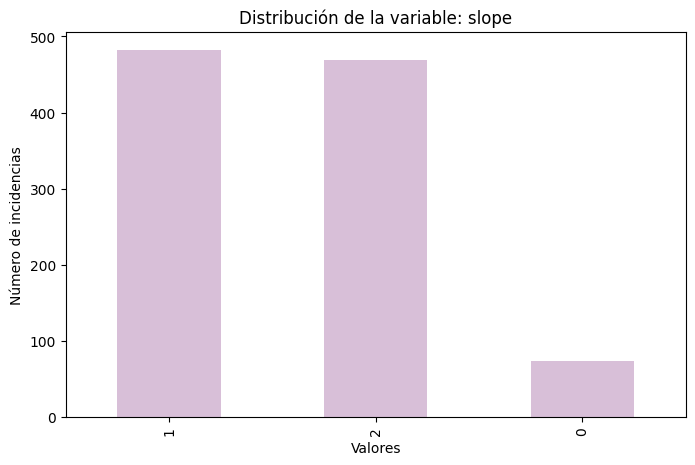

Distribución de la variable: thal
Valor: 2 - Numero de incidencias: 544 - Porcentaje: 53.07%
Valor: 3 - Numero de incidencias: 410 - Porcentaje: 40.0%
Valor: 1 - Numero de incidencias: 64 - Porcentaje: 6.24%
Valor: 0 - Numero de incidencias: 7 - Porcentaje: 0.68%


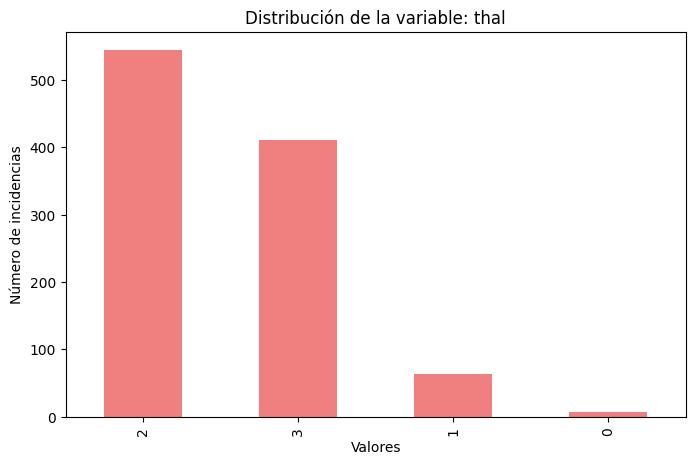

Distribución de la variable: target
Valor: 1 - Numero de incidencias: 526 - Porcentaje: 51.32%
Valor: 0 - Numero de incidencias: 499 - Porcentaje: 48.68%


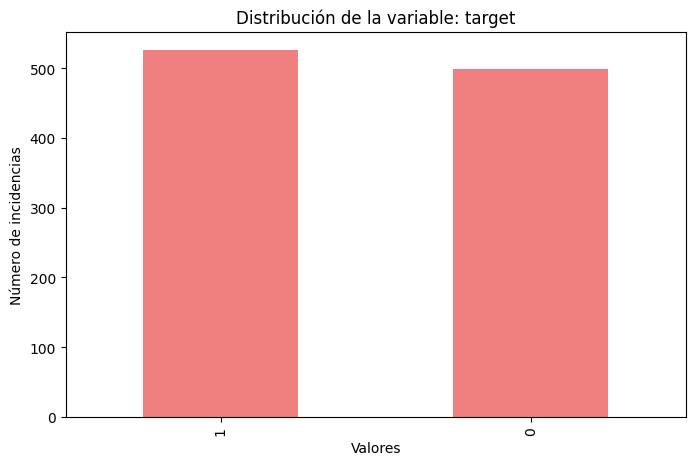

In [293]:
#LLamar a la función previamente creada
distributions_main_categories(categorical_columns, df)

## 2.3 Visualización de correlaciones entre variables DataSet Original.

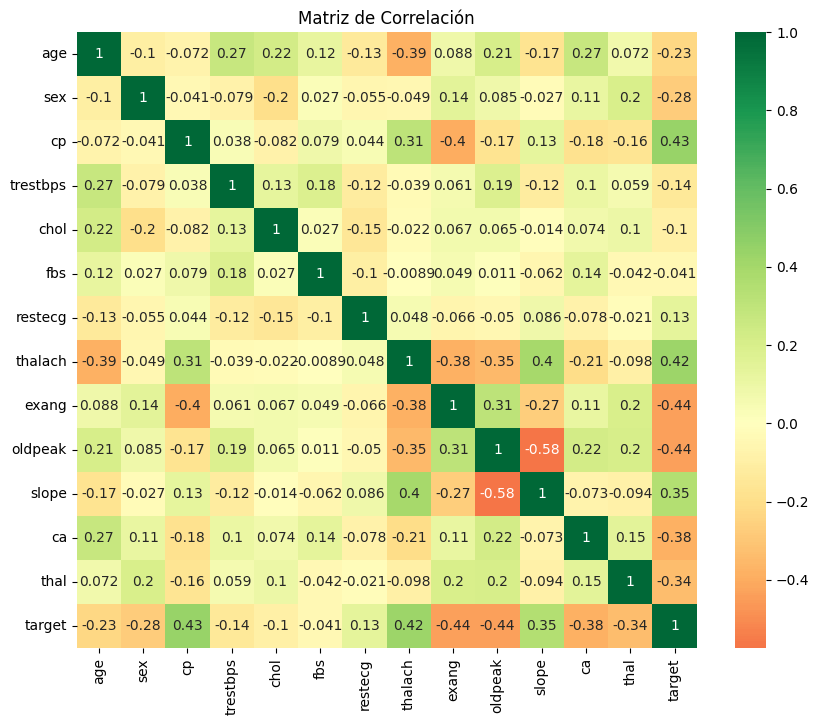

In [283]:
correlation_variables(df)

### **Conclusión del Análisis de Correlación**

El análisis de correlación revela una **relación débil positiva** entre las variables de nuestro conjunto de datos. La correlación positiva más alta es de **0.43** entre las variables **cp**  y **target**. Este hallazgo sugiere que las variables no poseen una dependencia lineal clara o fuerte, sin embargo cuando una variable aumenta, la otra también tiende a aumentar.

Por otra parte, el valor de **-0.58** indica una **correlación moderada negativa** entre las variables **slope** y **oldpeak**. Este hallazgo sugiere que las variables no poseen una dependencia lineal clara o fuerte, sin embargo cuando una variable aumenta, la otra tiende a disminuir. 

Además, ninguna de las variables muestra una **relación perfecta** con otras, o nignuna muestra una relación muy elevada.
